# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53935.000000,53935.000000,53935.000000,53935.000000,53935.000000,53935.000000,53935.000000,53935.000000,53935.000000
mean,0.797717,3.405970,3.051210,61.749326,57.457134,3931.939557,5.730866,5.732805,3.539466
std,0.473186,1.701001,1.647026,1.432434,2.234505,3988.204703,1.121229,1.112852,0.702645
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910025
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.525690
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.036050
max,4.130000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.020000,9.940000,31.800000


In [4]:
# x and y have larger standard deviations than z.
# there's a large standard deviation for color and clarity when compared to their means.
# there is a large standard deviation for price.

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
#carat and x,y,z (size of diamond)

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [6]:
diamonds.groupby(['color']).mean()

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0.0,1.159576,2.778332,61.884533,57.811903,5314.587313,6.516511,6.515374,4.030664
1.0,1.026377,2.964582,61.846541,57.576646,5090.006087,6.222103,6.222014,3.846372
2.0,0.911668,2.933879,61.837203,57.517873,4485.739010,5.983081,5.978442,3.697594
3.0,0.771190,3.463425,61.757111,57.288629,3999.135671,5.677543,5.680192,3.506894
4.0,0.736538,3.133934,61.694582,57.433536,3724.886397,5.614961,5.619456,3.465336
5.0,0.657882,2.969784,61.662076,57.491456,3076.854737,5.411607,5.416336,3.340760
6.0,0.657795,2.691513,61.698125,57.404590,3169.954096,5.417051,5.421128,3.342667


**What do you see? Pay special attention to the relationship between price and color.**

In [7]:
# It seems like, in general, the 'lower' the color (here, 0 represents the worst color), the higher the price.

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

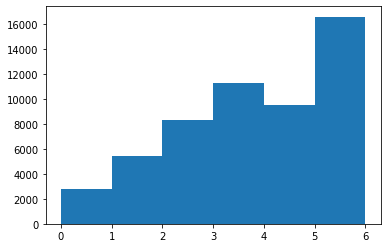

In [8]:
plt.hist(diamonds['color'],bins=range(0,7,1))
plt.show()

In [9]:
# the worse the color, the rarer a diamond appears to be.

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [10]:
diamonds.groupby('carat').mean()

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
0.20,5.166667,2.833333,61.100000,59.333333,365.166667,3.786667,3.753333,2.303021
0.21,5.444444,2.666667,60.511111,58.444444,380.222222,3.874444,3.837778,2.332788
0.22,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386137
0.23,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379,2.431810
0.24,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331,2.466390
0.25,4.146226,4.853774,61.565566,57.363208,550.924528,4.062500,4.086934,2.507744
0.26,3.928854,4.723320,61.677470,56.911858,550.897233,4.102688,4.124704,2.536781
0.27,4.047210,4.729614,61.599142,56.778970,574.759657,4.159142,4.181588,2.568519
0.28,3.898990,4.727273,61.526263,56.863636,580.121212,4.207172,4.233687,2.596223


In [11]:
#the higher the carat, the higher the price


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

C:\Users\lukes\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lukes\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


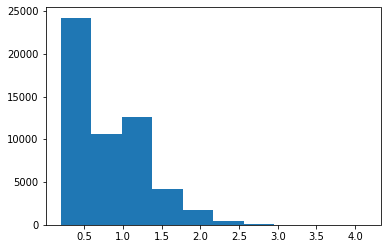

In [12]:
plt.hist(diamonds['carat'])
plt.show()
#the higher the carat, the less quantity

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [13]:
diamonds.groupby('table').mean()

,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.040000,1.000000,4.000000,62.900000,4997.000000,6.450000,6.410000,4.044470
44.0,0.290000,5.000000,4.000000,62.800000,474.000000,4.200000,4.240000,2.650160
49.0,0.650000,3.000000,3.000000,64.250000,2290.500000,5.355000,5.320000,3.426663
50.0,1.510000,3.000000,2.000000,61.500000,8995.500000,7.380000,7.295000,4.510200
50.1,0.940000,2.000000,1.000000,66.000000,3353.000000,6.130000,6.170000,4.059000
51.0,0.883333,3.222222,2.666667,63.300000,4063.666667,5.995556,5.941111,3.778826
51.6,2.000000,0.000000,4.000000,61.000000,13203.000000,8.140000,8.180000,4.977600
52.0,0.871071,3.517857,2.892857,62.833929,4342.000000,5.877143,5.870179,3.696398
52.4,0.500000,4.000000,4.000000,62.500000,1679.000000,5.070000,5.110000,3.181250


In [14]:
# There doesn't appear to be much correlation between table and price. 

**Finally, do the same with the `clarity` column.**

In [15]:
diamonds.groupby('clarity').mean()

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
0.0,1.270745,2.979675,62.728726,58.299593,3869.968835,6.746423,6.694919,4.213905
1.0,1.077548,3.470140,61.772479,57.927282,5062.251169,6.401187,6.392115,3.950068
2.0,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640928
3.0,0.763935,3.494208,61.724417,57.417401,3924.989395,5.657709,5.658859,3.492004
4.0,0.727185,3.161567,61.667442,57.315435,3839.671359,5.572230,5.578619,3.441150
5.0,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221723
6.0,0.503321,3.351573,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061024
7.0,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,4.989827,3.062041


In [16]:
# There might be something here - a clarity value of 1 seems to have a much higher price, and low clarity have a much lower price. 

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [17]:
# Carat seems like the strongest predictor, and color seems strong as well. But an overriding theme 

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


In [ ]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [19]:
# strong positive linear relationship between x and y
# strong positive non-linear relationship between carat, x and y 
# positive relationship between carat and price 
# positive relationship between x, y and price

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

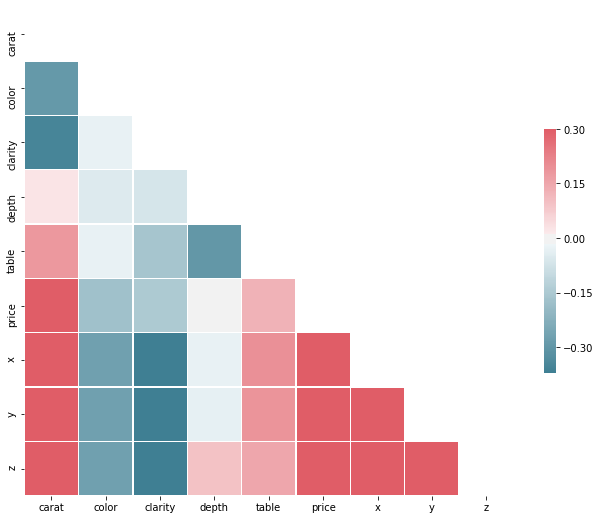

In [25]:
corr = diamonds.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
# It does fit. Price, size (x,y,z) and carat are all strongly correlated.

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

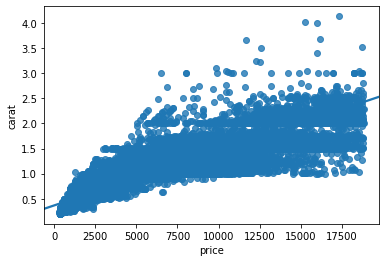

In [30]:
sns.regplot('price', 'carat', data=diamonds)

**What do you think?**

In [ ]:
# There seems to be a positive linear correlation

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
# carat is a pretty good indicator of price. I'd explore size as well, and look at carat vs size as well; it seems intuitive that weight and size would increase at a regular rate together, but we should check anyway. 

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.